In [91]:
import pandas as pd
from os import listdir
from os.path import isfile, join
from cryptocmd import CmcScraper #market cap data
from rich.progress import track
from IPython.display import clear_output

In [92]:
#Import all csv and save them in dict with filename (without extension, no USDT) as key
path = "Crypto_Data_Hourly//"
file_names = [f for f in listdir(path) if isfile(join(path, f))]
file_names.remove("BTTCUSDT.csv") #super tiny & no market cap data

dataframe_dict = {}

for file_name in track(file_names):
    dataframe_dict[file_name[:-8]] = pd.read_csv(path + file_name)
    dataframe_dict[file_name[:-8]]["Open Time"] = pd.to_datetime(dataframe_dict[file_name[:-8]]["Open Time"])

clear_output()
dataframe_dict.keys()

dict_keys(['1INCH', 'AAVE', 'ADA', 'ALGO', 'AMP', 'APE', 'AR', 'ATOM', 'AVAX', 'AXS', 'BAL', 'BAT', 'BCH', 'BNB', 'BNX', 'BTC', 'BTG', 'CAKE', 'CELO', 'COMP', 'CVX', 'DASH', 'DCR', 'DOGE', 'DOT', 'EGLD', 'ENJ', 'ENS', 'EOS', 'ETC', 'ETH', 'FIL', 'FLOW', 'FTM', 'FTT', 'GALA', 'GLMR', 'GMT', 'GRT', 'HBAR', 'HIVE', 'HNT', 'HOT', 'ICP', 'ICX', 'IMX', 'IOST', 'IOTA', 'IOTX', 'JST', 'KAVA', 'KDA', 'KLAY', 'KNC', 'KSM', 'LDO', 'LINK', 'LPT', 'LRC', 'LTC', 'MANA', 'MATIC', 'MINA', 'MKR', 'NEAR', 'NEO', 'NEXO', 'OMG', 'ONE', 'ONT', 'PAXG', 'QNT', 'QTUM', 'ROSE', 'RUNE', 'RVN', 'SAND', 'SC', 'SHIB', 'SNX', 'SOL', 'SRM', 'STORJ', 'STX', 'THETA', 'TRX', 'T', 'TUSD', 'TWT', 'UNI', 'USDP', 'VET', 'WAXP', 'WOO', 'XEC', 'XEM', 'XLM', 'XMR', 'XRP', 'XTZ', 'YFI', 'ZEC', 'ZEN', 'ZIL', 'ZRX'])

In [93]:
#Some datacleaning
#Each dataframe has Open Time twice for some reason. Let's drop that column from all df in the dict
#Let's also add return as pct_change of closing price
for crypto in dataframe_dict:
    dataframe_dict[crypto].drop('Open Time.1', inplace = True, axis = 1)
    dataframe_dict[crypto]["Return"] = dataframe_dict["BTC"]["Close"].pct_change()

In [94]:
print("See example dict entry for BTC:")
dataframe_dict["BTC"]

See example dict entry for BTC:


,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore,Return
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999000064,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395,NaN
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999000064,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409,-0.041238
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999000064,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529,0.007694
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999000064,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084,-0.012969
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999000064,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970,-0.017201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2022-07-17,21195.60,21684.54,20750.01,20798.16,118229.452500,2022-07-17 23:59:59.999000064,2.511251e+09,4261057,59550.952910,1.265043e+09,0.000000,-0.018751
1796,2022-07-18,20799.58,22777.63,20762.45,22432.58,239942.731320,2022-07-18 23:59:59.999000064,5.263397e+09,6564387,122398.318620,2.685273e+09,0.000000,0.078585
1797,2022-07-19,22432.58,23800.00,21579.54,23396.62,263770.765740,2022-07-19 23:59:59.999000064,5.954420e+09,6488375,132874.434050,2.999606e+09,0.000000,0.042975
1798,2022-07-20,23398.48,24276.74,22906.19,23223.30,238762.170940,2022-07-20 23:59:59.999000064,5.631801e+09,6364038,119820.553520,2.826789e+09,0.000000,-0.007408


In [95]:
#Let's identify stable coins by their low variance
variances = {}

#variances_df["crypto"] = dataframe_dict.keys()

for crypto in dataframe_dict:
    variances[crypto] = [dataframe_dict[crypto]['Open'].var()]

variances_df = pd.DataFrame(data = variances).T
variances_df = variances_df.rename(columns={0: "Variance"})
#display(variances_df.sort_values("Variance").head(10))

list_of_stable_coins = ["USDP", "TUSD"]
list_of_stable_coins■

['USDP', 'TUSD']

In [98]:
#getting marketcap data
## fixing some names for coinmarketcap data and deleting previous Market Cap columns if exist
coinmarketcap_names = {}
for crypto in dataframe_dict:
    coinmarketcap_names[crypto] = crypto
    dataframe_dict[crypto].drop(list(dataframe_dict[crypto].filter(regex = 'Market Cap')), axis = 1, inplace = True)

coinmarketcap_names["IOTA"] = "MIOTA" #actually only iota had problems

#start and end date for faster execution. Format given by CmcScraper library
start = dataframe_dict["BTC"]["Open Time"].iloc[0].strftime("%d-%m-%Y")
end = dataframe_dict["BTC"]["Open Time"].iloc[-1].strftime("%d-%m-%Y")

##scraping coinmarketcap and joining with original dfs
for crypto in track(dataframe_dict):
    scraper = CmcScraper(coinmarketcap_names[crypto], start, end)
    market_cap = scraper.get_dataframe()[["Date", "Market Cap"]]
    market_cap = market_cap.rename(columns = {"Date": "Open Time", "Market Cap": "Market Cap"})
    dataframe_dict[crypto] = pd.merge(dataframe_dict[crypto], market_cap, on = "Open Time")

clear_output()

In [99]:
#market cap dataframe: Building a df with coins as columns and open time as rows. Entries are the market cap of each coin for given time.
all_market_caps = pd.DataFrame()
all_market_caps["Open Time"] = dataframe_dict["BTC"]["Open Time"] #Bitcoin because it has the largest range of dates

for crypto in (dataframe_dict):
    all_market_caps = pd.merge(all_market_caps, dataframe_dict[crypto][["Open Time", "Market Cap"]], on = "Open Time", how = "outer")
    all_market_caps = all_market_caps.rename(columns={all_market_caps.columns[-1]: crypto})
all_market_caps = all_market_caps.fillna(0)

print("Beginning of dataframe for BTC, ETH & 1Inch. 1Inch is 0 because it didn't exist back then")
display(all_market_caps[["Open Time", "BTC", "ETH", "1INCH"]].head(3))

print("That's the whole dataframe. Lots of coins didn't exist in 2017")
all_market_caps.head(3)

Beginning of dataframe for BTC, ETH & 1Inch. 1Inch is 0 because it didn't exist back then


,Open Time,BTC,ETH,1INCH
0,2017-08-17,7.152795e+10,2.835757e+10,0.0
1,2017-08-18,6.871087e+10,2.781228e+10,0.0
2,2017-08-19,6.926514e+10,2.799589e+10,0.0


That's the whole dataframe. Lots of coins didn't exist in 2017


,Open Time,1INCH,AAVE,ADA,ALGO,AMP,APE,AR,ATOM,AVAX,...,XEM,XLM,XMR,XRP,XTZ,YFI,ZEC,ZEN,ZIL,ZRX
0,2017-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-08-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-08-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
len(dataframe_dict["BTC"]["Open Time"])

1800

In [124]:
#relative market cap dataframe: Basically transforming the dataframe from above to percentage so that each row sums up to 100%
rel_market_caps = all_market_caps.copy(deep=True)

#drop stable coins
print(f"Setting market cap of stable coins to 0: {list_of_stable_coins}")
rel_market_caps[list_of_stable_coins] = 0
#rel_market_caps.drop(list_of_stable_coins, inplace=True, axis = 1)

#transpose dataframe
rel_market_caps = rel_market_caps.transpose()
new_header = rel_market_caps.iloc[0] #grab the first row for the header
rel_market_caps = rel_market_caps[1:] #take the data less the header row
rel_market_caps.columns = new_header #set the header row as the df header

#divide each column by sum of market caps to get relative market cap
rel_market_caps = rel_market_caps / rel_market_caps.sum()
assert sum(rel_market_caps.sum()) == 1800 #assert if sums of all dates are 1 * 1800 dates

#transpose dataframe back
rel_market_caps = rel_market_caps.transpose()
rel_market_caps = rel_market_caps.reset_index(level=0)
assert rel_market_caps.columns.all() == all_market_caps.columns.all() #assert if transposing was successful
assert sum(rel_market_caps.loc[:, rel_market_caps.columns != "Open Time"].sum(axis = 1)) == 1800 #assert if sums of all dates are 1 * 1800 dates

rel_market_caps.tail(3)

Setting market cap of stable coins to 0: ['USDP', 'TUSD']


,Open Time,1INCH,AAVE,ADA,ALGO,AMP,APE,AR,ATOM,AVAX,...,XEM,XLM,XMR,XRP,XTZ,YFI,ZEC,ZEN,ZIL,ZRX
1797,2022-07-19,0.000478,0.001541,0.020271,0.002992,0.000463,0.002161,0.0006,0.003498,0.008133,...,0.000545,0.003452,0.00309,0.020898,0.00182,0.000286,0.001115,0.000264,0.000665,0.000326
1798,2022-07-20,0.000449,0.001492,0.019567,0.002828,0.000469,0.002128,0.000546,0.00328,0.007908,...,0.000512,0.00332,0.00325,0.020574,0.001726,0.000281,0.001091,0.000249,0.000632,0.000314
1799,2022-07-21,0.000451,0.001548,0.019655,0.002826,0.000454,0.002292,0.000555,0.003692,0.008279,...,0.000514,0.003323,0.003192,0.020662,0.001762,0.000287,0.001073,0.00025,0.000633,0.000318


In [156]:
dataframe_dict["1INCH"]["Quote Asset Volume"]

0      3.015108e+08
1      1.054189e+08
2      1.012742e+08
3      4.550593e+07
4      4.807372e+07
           ...     
569    3.616095e+06
570    1.032524e+07
571    9.751552e+06
572    5.863913e+06
573    2.054753e+06
Name: Quote Asset Volume, Length: 574, dtype: float64

In [158]:
#!!! does not work because different length of dataframes per crypto. Fix needed

avg_return_df = pd.DataFrame()
avg_return_df["Open Time"] = dataframe_dict["BTC"]["Open Time"] #Bitcoin because it has the largest range of dates
avg_return_df[["Return", "Quote Asset Volume"]] = 0


for crypto in dataframe_dict:
    values = dataframe_dict[crypto]["Return"]
    weights = rel_market_caps[crypto]
    avg_return = (values * weights).fillna(0)

    volume = dataframe_dict[crypto]["Quote Asset Volume"].fillna(0)

    avg_return_df["Return"] += avg_return
    avg_return_df["Quote Asset Volume"] += volume

    assert avg_return_df.isnull().sum().any() == 0, f"{crypto}"
    
display(avg_return_df.tail(5))
#avg_return_df["Return"].plot()

AssertionError: 1INCH

{'whiskers': [<matplotlib.lines.Line2D at 0x221824a0c40>,
 'caps': [<matplotlib.lines.Line2D at 0x221824a11e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x221824a0970>],
 'medians': [<matplotlib.lines.Line2D at 0x221824a1780>],
 'fliers': [],
 'means': []}

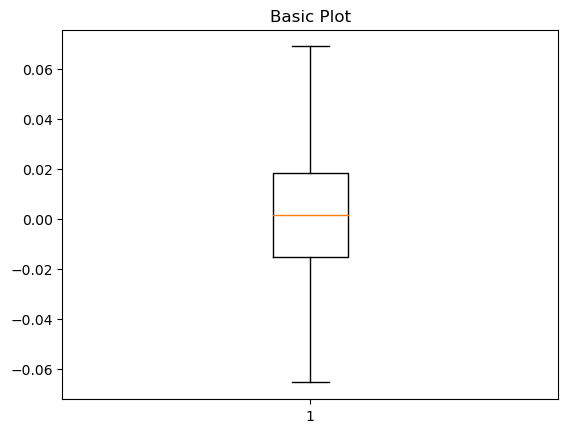

In [141]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(avg_return_df["Return"], showfliers=False)

In [6]:
#TODO: copy the dataframe_dict (deep copy bc dict is mutable) and replace all the price-related columns like Open, High etc. with relative prices
#-> easy to achieve by dividing all the price columns by the last closing price. That way last closing price is 100%. If closing price of
#day before was 10% lower it will have a price of 90% in the new df

#Why? Because if we use absolute prices to create a basket we have the issue that coins with low number of tokens impact the price way more
#than they should. Example: crypto1 has a price of 1€ and in total 1.000 coins -> market cap of 1000€. crypto 2 has a price of 500€
#and in total 2 coins -> market cap of 1000€. 
# If we aggregate by absolute price we might say that the basket crypto has a price of 50% * 1€ + 50% * 500€ = 250.5€

#If crypto 2 decreases by 1% and crypto1 increases by 10% you could say that the market in total
#moved up (both have equal market caps so average of 10% & -1% is positive). But when you aggregate by absolute price
#again you would get a new basket crypto price of [52.6% * 1.1€ + 47.4% * 495] = 235€! So market supposedly went down!
#Relative prices fix this

In [102]:
#TODO aggregate all cryptos (except stable coins) into a basket crypto. Simple sum for volume, number of trades etc. and weighted sumproduct for price related columns
#market cap can also just be summed up, because the market cap is inherently weighed correctly

basket = dataframe_dict["BTC"].copy(deep=True) #Bitcoin because it has the largest range of dates
basket[["Open", "High", "Low", "Close", "Volume", "Quote Asset Volume", "Number of Trades", "TB Base Volume",\
    "TB Quote Volume", "Ignore", "Return", "Market Cap"]] = 0
basket

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore,Return,Market Cap
0,2017-08-17,0,0,0,0,0,2017-08-17 23:59:59.999000064,0,0,0,0,0,0,0
1,2017-08-18,0,0,0,0,0,2017-08-18 23:59:59.999000064,0,0,0,0,0,0,0
2,2017-08-19,0,0,0,0,0,2017-08-19 23:59:59.999000064,0,0,0,0,0,0,0
3,2017-08-20,0,0,0,0,0,2017-08-20 23:59:59.999000064,0,0,0,0,0,0,0
4,2017-08-21,0,0,0,0,0,2017-08-21 23:59:59.999000064,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2022-07-17,0,0,0,0,0,2022-07-17 23:59:59.999000064,0,0,0,0,0,0,0
1796,2022-07-18,0,0,0,0,0,2022-07-18 23:59:59.999000064,0,0,0,0,0,0,0
1797,2022-07-19,0,0,0,0,0,2022-07-19 23:59:59.999000064,0,0,0,0,0,0,0
1798,2022-07-20,0,0,0,0,0,2022-07-20 23:59:59.999000064,0,0,0,0,0,0,0
